Инициализация проекта

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

data= pd.read_csv('diamonds.csv')

Price price in US dollars (\$326--\$18,823)

Carat weight of the diamond (0.2--5.01)

Cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

Color diamond colour, from J (worst) to D (best)

Clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

X length in mm (0--10.74)

Y width in mm (0--58.9)

Z depth in mm (0--31.8)

Depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

Table width of top of diamond relative to widest point (43--95)

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [3]:
data.head(20)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [4]:
data.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Выводы:
*   Масса алмаза влияет на его цену
*   Глубина слабо влияет на цену алмаза
*   Масса алмаза влияет на его цену
*   Срез влияет на цену алмаза
*   Размер влияет на цену алмаза
*   Чистота влияет на цену алмаза

Обработка пропущенных значений

In [5]:
(data.isna().sum()/data.shape[0]*100).sort_values(ascending=False)

Unnamed: 0    0.0
carat         0.0
cut           0.0
color         0.0
clarity       0.0
depth         0.0
table         0.0
price         0.0
x             0.0
y             0.0
z             0.0
dtype: float64

In [6]:
data = data[(data[['x', 'y', 'z']] != 0).all(axis=1)]
data.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,26972.355731,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,15571.269010,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,1.000000,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,13487.750000,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,26973.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40457.250000,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Заключение:
- Строки с недостающими значниями в столбцах x, y, z были удалены

Коррекция типов данных

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53920 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53920 non-null  int64  
 1   carat       53920 non-null  float64
 2   cut         53920 non-null  object 
 3   color       53920 non-null  object 
 4   clarity     53920 non-null  object 
 5   depth       53920 non-null  float64
 6   table       53920 non-null  float64
 7   price       53920 non-null  int64  
 8   x           53920 non-null  float64
 9   y           53920 non-null  float64
 10  z           53920 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.9+ MB


In [8]:
data['table'] = data['table'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53920 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53920 non-null  int64  
 1   carat       53920 non-null  float64
 2   cut         53920 non-null  object 
 3   color       53920 non-null  object 
 4   clarity     53920 non-null  object 
 5   depth       53920 non-null  float64
 6   table       53920 non-null  int64  
 7   price       53920 non-null  int64  
 8   x           53920 non-null  float64
 9   y           53920 non-null  float64
 10  z           53920 non-null  float64
dtypes: float64(5), int64(3), object(3)
memory usage: 4.9+ MB


In [9]:
def f(a):
    if a== "Fair": return 1
    if a== "Good": return 2
    if a== 'Very Good': return 3
    if a== 'Premium': return 4
    if a== 'Ideal': return 5

print(data['cut'].unique())

data["cut"] = data["cut"].map(f)

data.info()

data.head(20)

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
<class 'pandas.core.frame.DataFrame'>
Index: 53920 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53920 non-null  int64  
 1   carat       53920 non-null  float64
 2   cut         53920 non-null  int64  
 3   color       53920 non-null  object 
 4   clarity     53920 non-null  object 
 5   depth       53920 non-null  float64
 6   table       53920 non-null  int64  
 7   price       53920 non-null  int64  
 8   x           53920 non-null  float64
 9   y           53920 non-null  float64
 10  z           53920 non-null  float64
dtypes: float64(5), int64(4), object(2)
memory usage: 4.9+ MB


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,5,E,SI2,61.5,55,326,3.95,3.98,2.43
1,2,0.21,4,E,SI1,59.8,61,326,3.89,3.84,2.31
2,3,0.23,2,E,VS1,56.9,65,327,4.05,4.07,2.31
3,4,0.29,4,I,VS2,62.4,58,334,4.20,4.23,2.63
4,5,0.31,2,J,SI2,63.3,58,335,4.34,4.35,2.75
5,6,0.24,3,J,VVS2,62.8,57,336,3.94,3.96,2.48
6,7,0.24,3,I,VVS1,62.3,57,336,3.95,3.98,2.47
7,8,0.26,3,H,SI1,61.9,55,337,4.07,4.11,2.53
8,9,0.22,1,E,VS2,65.1,61,337,3.87,3.78,2.49
9,10,0.23,3,H,VS1,59.4,61,338,4.00,4.05,2.39


In [10]:
print(data['color'].unique())

def f(a):
    if a== "J": return 1
    if a== "I": return 2
    if a== 'H': return 3
    if a== 'G': return 4
    if a== 'F': return 5
    if a== 'E': return 6
    if a== 'D': return 7

data["color"] = data["color"].map(f)

data.info()

data.head(20)

['E' 'I' 'J' 'H' 'F' 'G' 'D']
<class 'pandas.core.frame.DataFrame'>
Index: 53920 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53920 non-null  int64  
 1   carat       53920 non-null  float64
 2   cut         53920 non-null  int64  
 3   color       53920 non-null  int64  
 4   clarity     53920 non-null  object 
 5   depth       53920 non-null  float64
 6   table       53920 non-null  int64  
 7   price       53920 non-null  int64  
 8   x           53920 non-null  float64
 9   y           53920 non-null  float64
 10  z           53920 non-null  float64
dtypes: float64(5), int64(5), object(1)
memory usage: 4.9+ MB


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,5,6,SI2,61.5,55,326,3.95,3.98,2.43
1,2,0.21,4,6,SI1,59.8,61,326,3.89,3.84,2.31
2,3,0.23,2,6,VS1,56.9,65,327,4.05,4.07,2.31
3,4,0.29,4,2,VS2,62.4,58,334,4.20,4.23,2.63
4,5,0.31,2,1,SI2,63.3,58,335,4.34,4.35,2.75
5,6,0.24,3,1,VVS2,62.8,57,336,3.94,3.96,2.48
6,7,0.24,3,2,VVS1,62.3,57,336,3.95,3.98,2.47
7,8,0.26,3,3,SI1,61.9,55,337,4.07,4.11,2.53
8,9,0.22,1,6,VS2,65.1,61,337,3.87,3.78,2.49
9,10,0.23,3,3,VS1,59.4,61,338,4.00,4.05,2.39


In [11]:
print(data['clarity'].unique())

def f(a):
    if a== "I1": return 1
    if a== "SI2": return 2
    if a== 'SI1': return 3
    if a== 'VS2': return 4
    if a== 'VS1': return 5
    if a== 'VVS2': return 6
    if a== 'VVS1': return 7
    if a== 'IF': return 8
data["clarity"] = data["clarity"].map(f)

data.info()

data.head(20)

['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']
<class 'pandas.core.frame.DataFrame'>
Index: 53920 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53920 non-null  int64  
 1   carat       53920 non-null  float64
 2   cut         53920 non-null  int64  
 3   color       53920 non-null  int64  
 4   clarity     53920 non-null  int64  
 5   depth       53920 non-null  float64
 6   table       53920 non-null  int64  
 7   price       53920 non-null  int64  
 8   x           53920 non-null  float64
 9   y           53920 non-null  float64
 10  z           53920 non-null  float64
dtypes: float64(5), int64(6)
memory usage: 4.9 MB


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,5,6,2,61.5,55,326,3.95,3.98,2.43
1,2,0.21,4,6,3,59.8,61,326,3.89,3.84,2.31
2,3,0.23,2,6,5,56.9,65,327,4.05,4.07,2.31
3,4,0.29,4,2,4,62.4,58,334,4.20,4.23,2.63
4,5,0.31,2,1,2,63.3,58,335,4.34,4.35,2.75
5,6,0.24,3,1,6,62.8,57,336,3.94,3.96,2.48
6,7,0.24,3,2,7,62.3,57,336,3.95,3.98,2.47
7,8,0.26,3,3,3,61.9,55,337,4.07,4.11,2.53
8,9,0.22,1,6,4,65.1,61,337,3.87,3.78,2.49
9,10,0.23,3,3,5,59.4,61,338,4.00,4.05,2.39


In [12]:
del data['Unnamed: 0']

data.info()

data.head(20)

<class 'pandas.core.frame.DataFrame'>
Index: 53920 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53920 non-null  float64
 1   cut      53920 non-null  int64  
 2   color    53920 non-null  int64  
 3   clarity  53920 non-null  int64  
 4   depth    53920 non-null  float64
 5   table    53920 non-null  int64  
 6   price    53920 non-null  int64  
 7   x        53920 non-null  float64
 8   y        53920 non-null  float64
 9   z        53920 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 4.5 MB


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,2,61.5,55,326,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61,326,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65,327,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58,334,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58,335,4.34,4.35,2.75
5,0.24,3,1,6,62.8,57,336,3.94,3.96,2.48
6,0.24,3,2,7,62.3,57,336,3.95,3.98,2.47
7,0.26,3,3,3,61.9,55,337,4.07,4.11,2.53
8,0.22,1,6,4,65.1,61,337,3.87,3.78,2.49
9,0.23,3,3,5,59.4,61,338,4.00,4.05,2.39


Заключение:
- тип данных столбца 'cut', 'clarity', 'color' преобразуется в int;
- значения столбца 'table' должны иметь тип данных int, а не float, поскольку эти столбцы не нуждаются в десятичном формате.
- удалён  столбец 'Unnamed: 0'

Обогащение данных

Объем алмаза:

In [13]:
data['volume'] = data['x'] * data['y'] * data['z']

data.info()

data.head(20)

<class 'pandas.core.frame.DataFrame'>
Index: 53920 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53920 non-null  float64
 1   cut      53920 non-null  int64  
 2   color    53920 non-null  int64  
 3   clarity  53920 non-null  int64  
 4   depth    53920 non-null  float64
 5   table    53920 non-null  int64  
 6   price    53920 non-null  int64  
 7   x        53920 non-null  float64
 8   y        53920 non-null  float64
 9   z        53920 non-null  float64
 10  volume   53920 non-null  float64
dtypes: float64(6), int64(5)
memory usage: 4.9 MB


,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,5,6,2,61.5,55,326,3.95,3.98,2.43,38.202030
1,0.21,4,6,3,59.8,61,326,3.89,3.84,2.31,34.505856
2,0.23,2,6,5,56.9,65,327,4.05,4.07,2.31,38.076885
3,0.29,4,2,4,62.4,58,334,4.20,4.23,2.63,46.724580
4,0.31,2,1,2,63.3,58,335,4.34,4.35,2.75,51.917250
5,0.24,3,1,6,62.8,57,336,3.94,3.96,2.48,38.693952
6,0.24,3,2,7,62.3,57,336,3.95,3.98,2.47,38.830870
7,0.26,3,3,3,61.9,55,337,4.07,4.11,2.53,42.321081
8,0.22,1,6,4,65.1,61,337,3.87,3.78,2.49,36.425214
9,0.23,3,3,5,59.4,61,338,4.00,4.05,2.39,38.718000


Плотность:

In [14]:
data['density'] = data['carat'] / data['volume']

data.info()

data.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 53920 entries, 0 to 53939
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53920 non-null  float64
 1   cut      53920 non-null  int64  
 2   color    53920 non-null  int64  
 3   clarity  53920 non-null  int64  
 4   depth    53920 non-null  float64
 5   table    53920 non-null  int64  
 6   price    53920 non-null  int64  
 7   x        53920 non-null  float64
 8   y        53920 non-null  float64
 9   z        53920 non-null  float64
 10  volume   53920 non-null  float64
 11  density  53920 non-null  float64
dtypes: float64(7), int64(5)
memory usage: 5.3 MB


,carat,cut,color,clarity,depth,table,price,x,y,z,volume,density
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,3.904228,4.405972,4.051502,61.749514,57.448312,3930.993231,5.731627,5.734887,3.540046,129.897567,0.006127
std,0.473795,1.116579,1.701272,1.647005,1.432331,2.239354,3987.280446,1.119423,1.140126,0.702530,78.219789,0.000178
min,0.200000,1.000000,1.000000,1.000000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000,31.707984,0.000521
25%,0.400000,3.000000,3.000000,3.000000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000,65.189759,0.006048
50%,0.700000,4.000000,4.000000,4.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,114.840180,0.006117
75%,1.040000,5.000000,6.000000,5.000000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000,170.846415,0.006190
max,5.010000,5.000000,7.000000,8.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,3840.598060,0.022647


In [15]:
data.head(20)

,carat,cut,color,clarity,depth,table,price,x,y,z,volume,density
0,0.23,5,6,2,61.5,55,326,3.95,3.98,2.43,38.202030,0.006021
1,0.21,4,6,3,59.8,61,326,3.89,3.84,2.31,34.505856,0.006086
2,0.23,2,6,5,56.9,65,327,4.05,4.07,2.31,38.076885,0.006040
3,0.29,4,2,4,62.4,58,334,4.20,4.23,2.63,46.724580,0.006207
4,0.31,2,1,2,63.3,58,335,4.34,4.35,2.75,51.917250,0.005971
5,0.24,3,1,6,62.8,57,336,3.94,3.96,2.48,38.693952,0.006203
6,0.24,3,2,7,62.3,57,336,3.95,3.98,2.47,38.830870,0.006181
7,0.26,3,3,3,61.9,55,337,4.07,4.11,2.53,42.321081,0.006144
8,0.22,1,6,4,65.1,61,337,3.87,3.78,2.49,36.425214,0.006040
9,0.23,3,3,5,59.4,61,338,4.00,4.05,2.39,38.718000,0.005940


Заключение:
- добавлен столбец объёма алмазов
- добавлен столбец плотности алмазов

Проверка данных

Дупликаты:

In [16]:
data.duplicated().sum()

np.int64(145)

In [17]:
data.drop_duplicates(inplace=True)

data.duplicated().sum()

np.int64(0)

EDA

In [18]:
data.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume,density
count,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000
mean,0.797536,3.904231,4.406267,4.052366,61.748232,57.449261,3931.220288,5.731579,5.734909,3.539964,129.872846,0.006127
std,0.473169,1.116097,1.701271,1.646733,1.429639,2.238567,3985.918716,1.118611,1.139451,0.702017,78.136513,0.000177
min,0.200000,1.000000,1.000000,1.000000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000,31.707984,0.000521
25%,0.400000,3.000000,3.000000,3.000000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000,65.214611,0.006048
50%,0.700000,4.000000,4.000000,4.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,114.852720,0.006117
75%,1.040000,5.000000,6.000000,5.000000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.030000,170.839422,0.006190
max,5.010000,5.000000,7.000000,8.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,3840.598060,0.022647


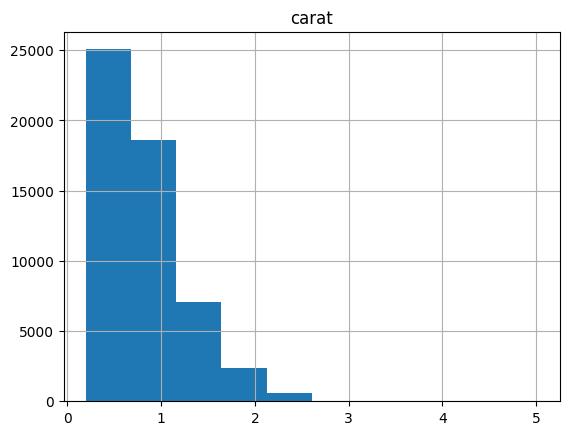

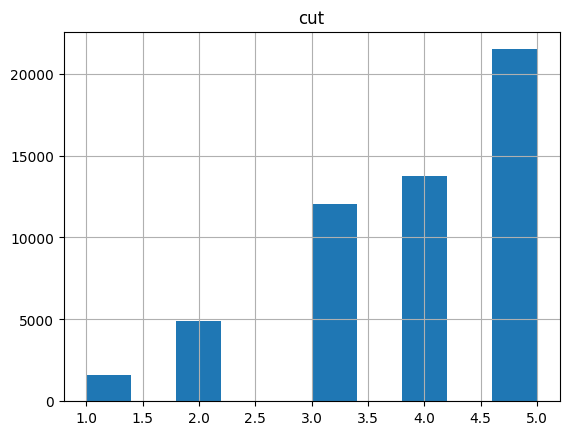

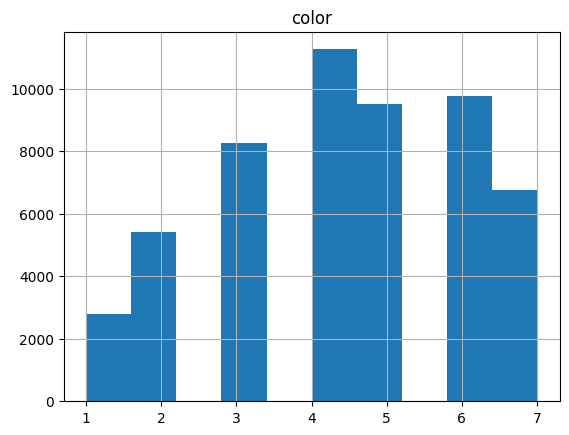

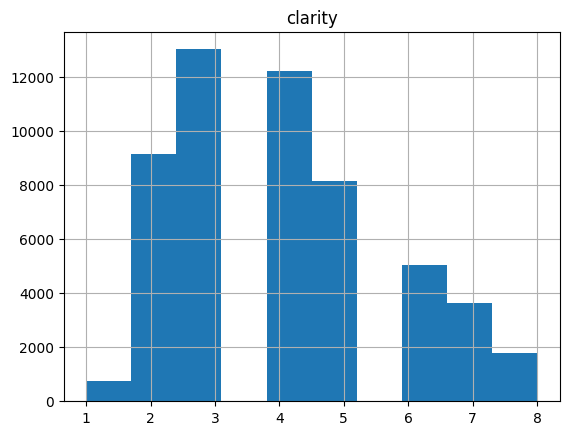

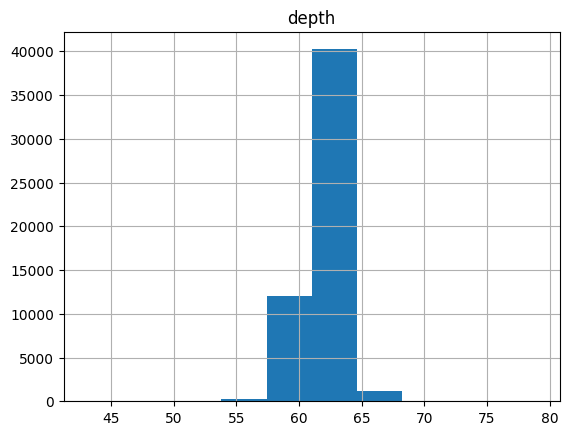

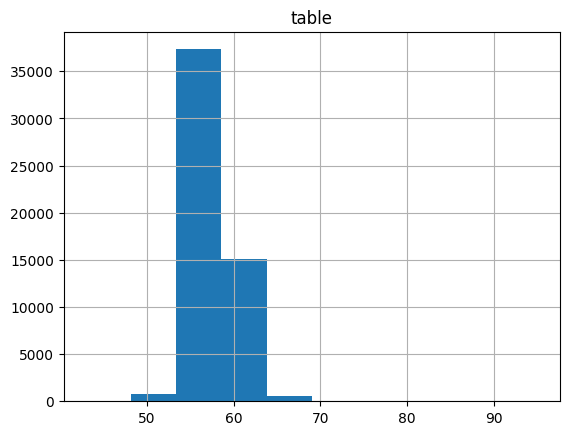

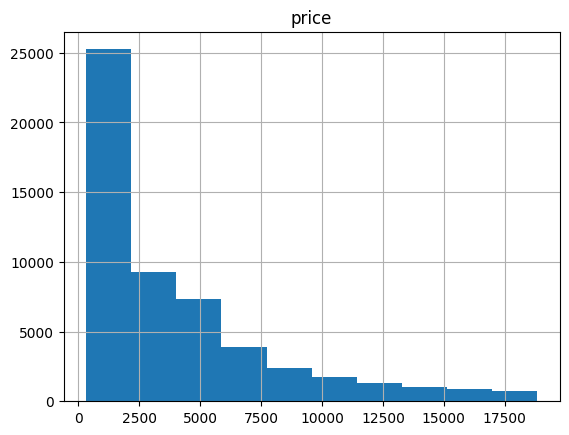

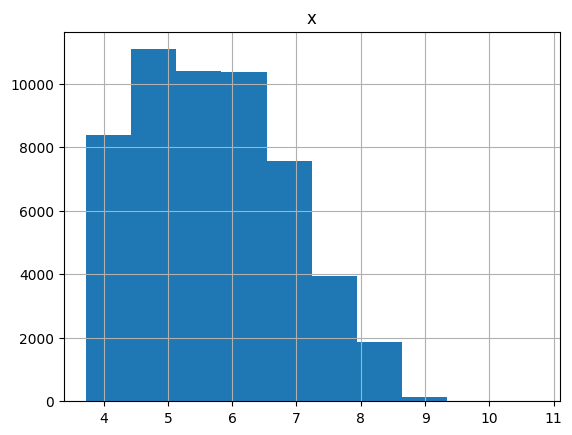

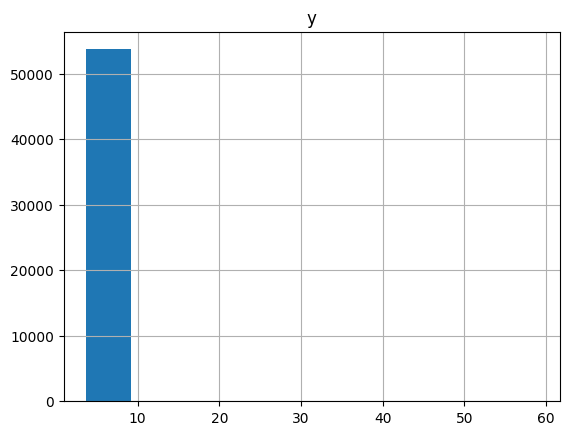

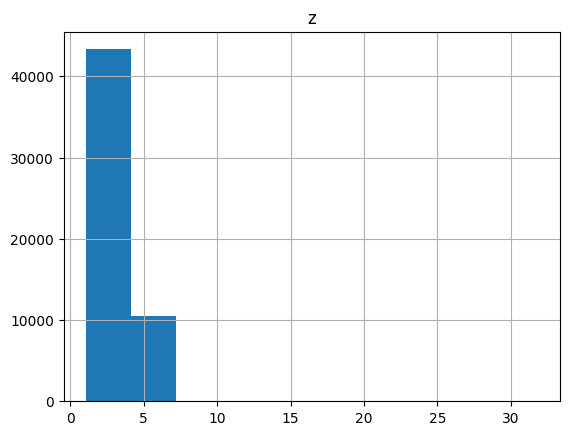

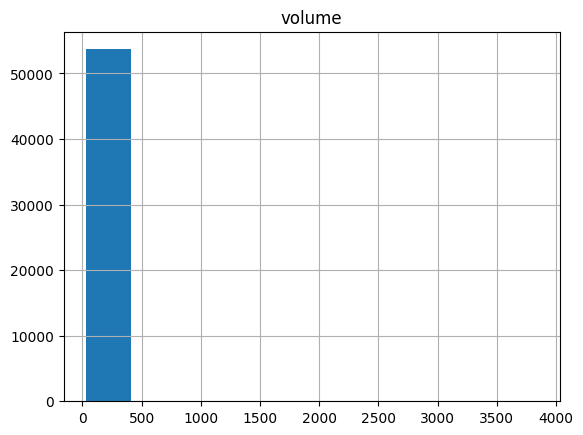

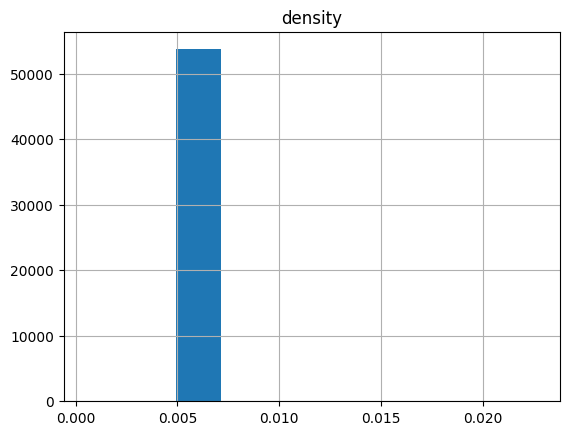

In [19]:
columns = ['carat','cut','color','clarity','depth', 'table', 'price', 'x', 'y', 'z', 'volume', 'density']
for column in columns:
    data.hist(column)

Заключение:
- Выбросы затрудняют чтение данных о массе, x, y, z алмазов. Из-за выбросов в xyz появились выбросы в volume, density и table
- На гистограмме данные масс, x, y и z смещены вправо, тогда среднее значение обычно больше медианы

Изучение и обработка выбросов

In [20]:
outlier = data[['carat', 'x','y','z']]
outlier

,carat,x,y,z
0,0.23,3.95,3.98,2.43
1,0.21,3.89,3.84,2.31
2,0.23,4.05,4.07,2.31
3,0.29,4.20,4.23,2.63
4,0.31,4.34,4.35,2.75
...,...,...,...,...
53935,0.72,5.75,5.76,3.50
53936,0.72,5.69,5.75,3.61
53937,0.70,5.66,5.68,3.56
53938,0.86,6.15,6.12,3.74


In [21]:
Q1 = outlier.quantile(0.25)
Q1

carat    0.40
x        4.71
y        4.72
z        2.91
Name: 0.25, dtype: float64

In [22]:
Q3 = outlier.quantile(0.75)
Q3

carat    1.04
x        6.54
y        6.54
z        4.03
Name: 0.75, dtype: float64

In [23]:
IQR = Q3-Q1

data_filtered = outlier[~((outlier < (Q1 - 1.5 * IQR)) |(outlier > (Q3 + 1.5 * IQR))).any(axis=1)]
data_filtered

,carat,x,y,z
0,0.23,3.95,3.98,2.43
1,0.21,3.89,3.84,2.31
2,0.23,4.05,4.07,2.31
3,0.29,4.20,4.23,2.63
4,0.31,4.34,4.35,2.75
...,...,...,...,...
53935,0.72,5.75,5.76,3.50
53936,0.72,5.69,5.75,3.61
53937,0.70,5.66,5.68,3.56
53938,0.86,6.15,6.12,3.74


In [24]:
index_list = list(data_filtered.index.values)

In [25]:
data_filtered = data[data.index.isin(index_list)]
data_filtered.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume,density
0,0.23,5,6,2,61.5,55,326,3.95,3.98,2.43,38.202030,0.006021
1,0.21,4,6,3,59.8,61,326,3.89,3.84,2.31,34.505856,0.006086
2,0.23,2,6,5,56.9,65,327,4.05,4.07,2.31,38.076885,0.006040
3,0.29,4,2,4,62.4,58,334,4.20,4.23,2.63,46.724580,0.006207
4,0.31,2,1,2,63.3,58,335,4.34,4.35,2.75,51.917250,0.005971


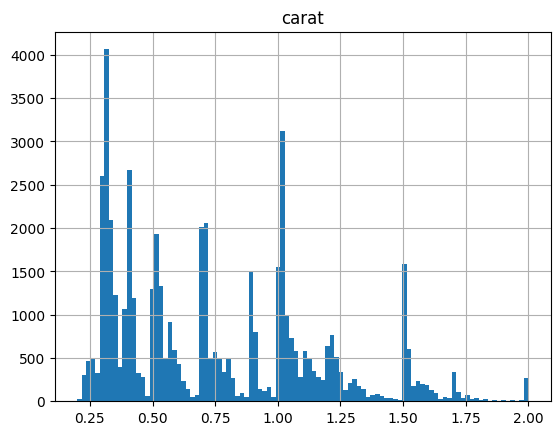

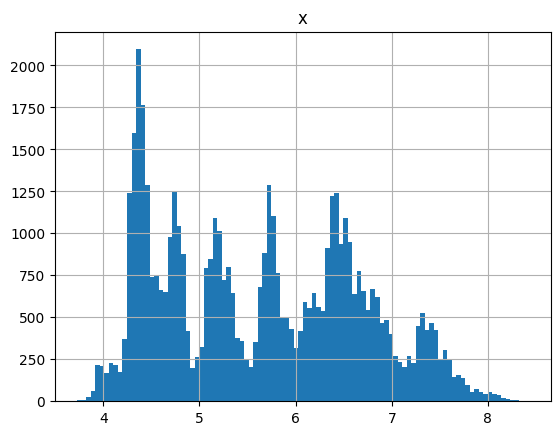

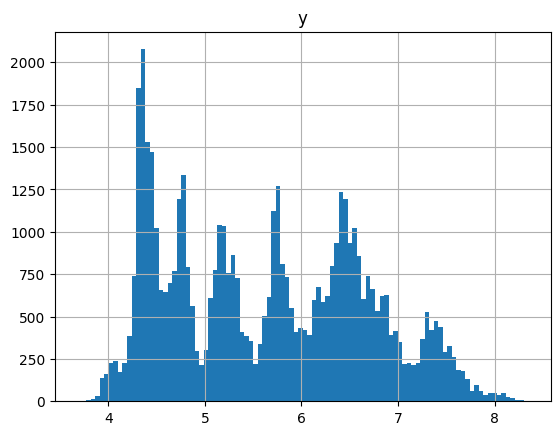

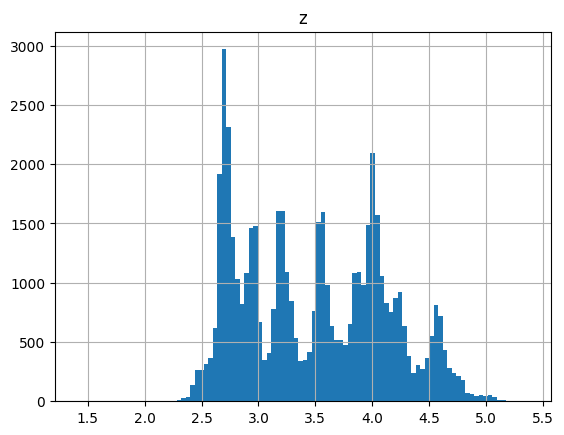

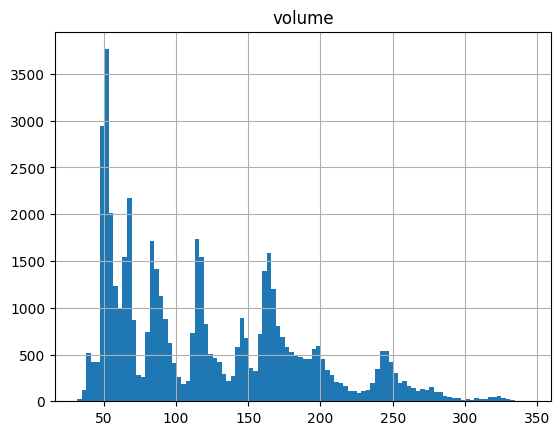

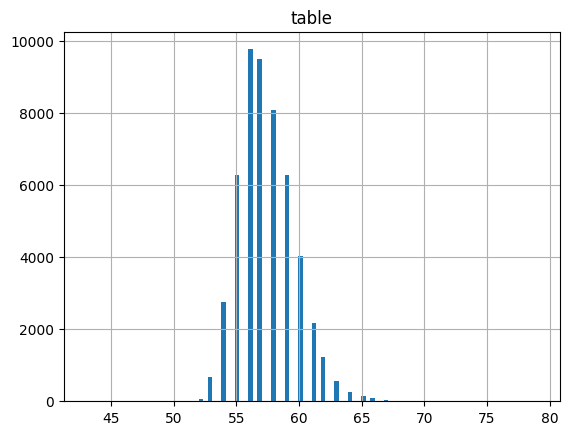

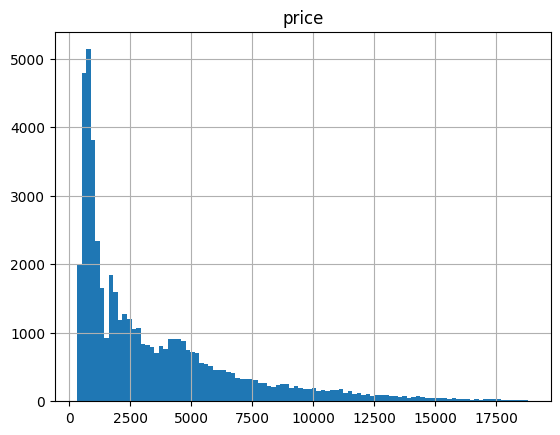

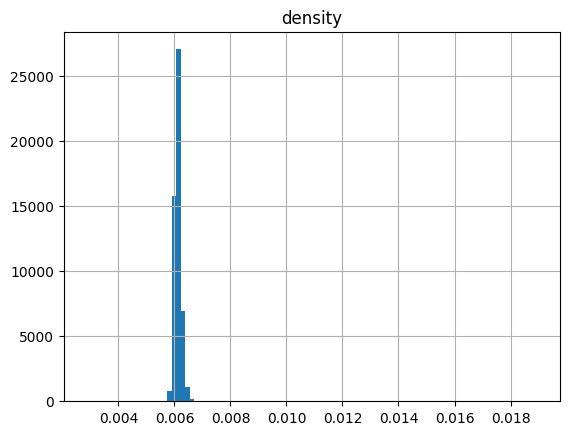

In [26]:
filtered_outlier = data_filtered[['carat', 'x','y','z', 'volume', 'table', 'price', 'density']]

for col in filtered_outlier:
    data_filtered.hist(col, bins=100)

Заключение:
- Определили нижний и верхний пределы выбросов, определив 25-й и 75-й процентили. Затем нашли межквартильный размах. Использовали эту информацию для фильтрации выбросов. После удаления выбросов график выглядит более симметричным по сравнению с выбросами, и в данных легче наблюдать среднее значение, медиану и моду.
- Судя по гистограмме значений столбца 'carat', распределение большинства алмазов по массе находится в диапазоне 0.25–0.5. В диапазоне 1.75-2.00 карат распределялся меньше всего алмазов.
- Судя по гистограмме значений столбца 'volume', распределение большинства алмазов по объёму находится в диапазоне 50–100. В диапазоне 300-350 распределялся меньше всего алмазов.
- Судя по гистограмме значений столбца 'table', распределение большинства алмазов по объёму находится в диапазоне 55–60.

Изучение основных параметров без выбросов

[[<Axes: title={'center': 'carat'}>]]
[[<Axes: title={'center': 'carat'}>]]


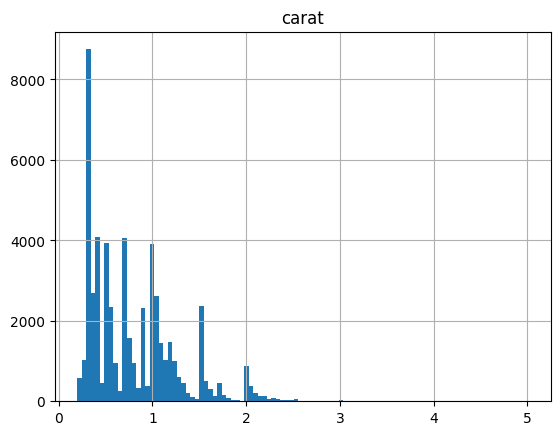

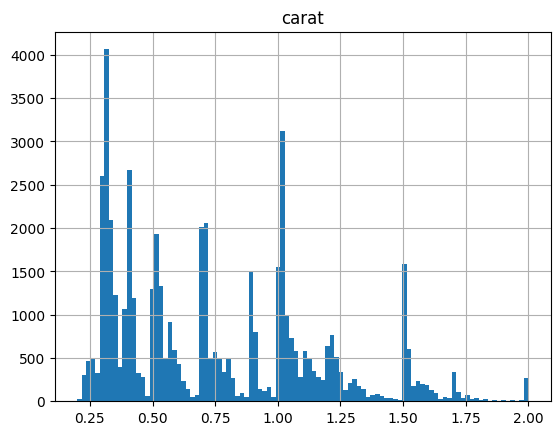

In [27]:
print (data.hist('carat', bins=100))
print (data_filtered.hist('carat', bins=100))

In [28]:
data_filtered.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume,density
count,51904.000000,51904.000000,51904.000000,51904.000000,51904.000000,51904.000000,51904.000000,51904.000000,51904.000000,51904.000000,51904.000000,51904.000000
mean,0.748796,3.911895,4.465032,4.102959,61.748008,57.418677,3534.578356,5.640388,5.643167,3.483335,121.917230,0.006125
std,0.401954,1.115147,1.679206,1.642497,1.415410,2.227468,3415.866962,1.026581,1.019801,0.634717,64.877828,0.000155
min,0.200000,1.000000,1.000000,1.000000,43.000000,43.000000,326.000000,3.730000,3.680000,1.410000,31.707984,0.002847
25%,0.390000,3.000000,3.000000,3.000000,61.100000,56.000000,928.000000,4.690000,4.700000,2.890000,64.144548,0.006047
50%,0.700000,4.000000,4.000000,4.000000,61.800000,57.000000,2290.000000,5.650000,5.660000,3.490000,113.076714,0.006115
75%,1.020000,5.000000,6.000000,5.000000,62.500000,59.000000,4959.000000,6.480000,6.470000,4.010000,166.461454,0.006188
max,2.000000,5.000000,7.000000,8.000000,79.000000,79.000000,18818.000000,8.420000,8.350000,5.370000,343.869300,0.018947


In [29]:
data.median()

carat         0.700000
cut           4.000000
color         4.000000
clarity       4.000000
depth        61.800000
table        57.000000
price      2401.000000
x             5.700000
y             5.710000
z             3.530000
volume      114.852720
density       0.006117
dtype: float64

Заключение
- Маскимальный вес уменьшен с 5 до 2 карат. Гистограмма стала более простой для понимания. Среднее значение выше медианы, поэтому гистограмма имеет наклон вправо.
- На гистограмме без выбросов видно, что вес большей части алмазов находится в промежутке между 0.25 и 0.50. Максимальным весом является 2 карат, а минимальным - 0.2 карат. Средний вес - 0.75 карат.

[[<Axes: title={'center': 'volume'}>]]
[[<Axes: title={'center': 'volume'}>]]


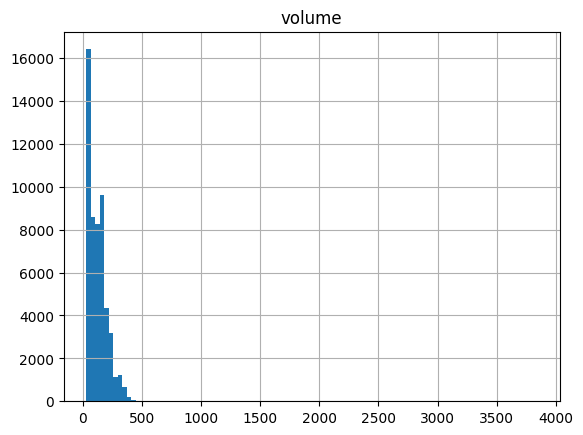

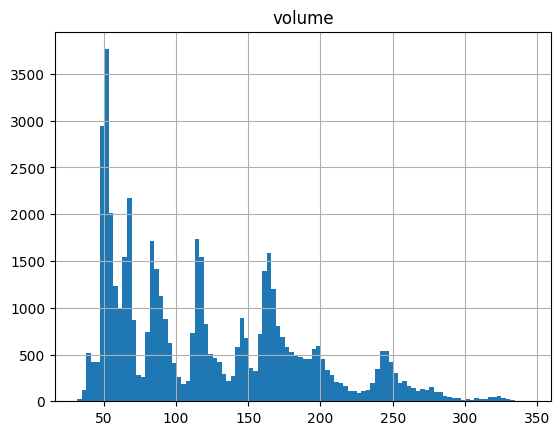

In [30]:
print (data.hist('volume', bins=100))
print (data_filtered.hist('volume', bins=100))

[[<Axes: title={'center': 'x'}>]]
[[<Axes: title={'center': 'x'}>]]
[[<Axes: title={'center': 'y'}>]]
[[<Axes: title={'center': 'y'}>]]
[[<Axes: title={'center': 'z'}>]]
[[<Axes: title={'center': 'z'}>]]


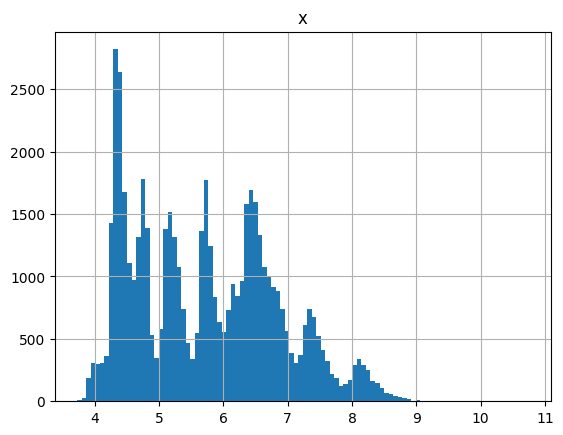

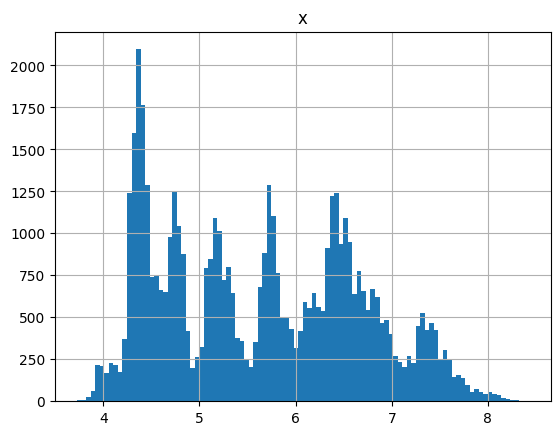

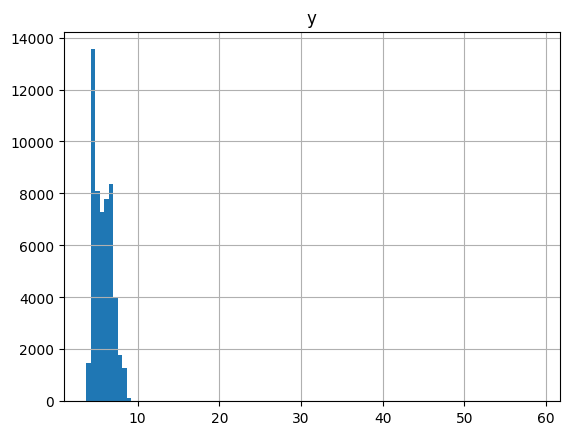

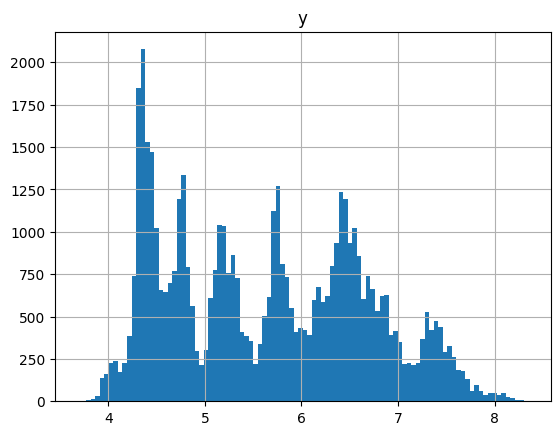

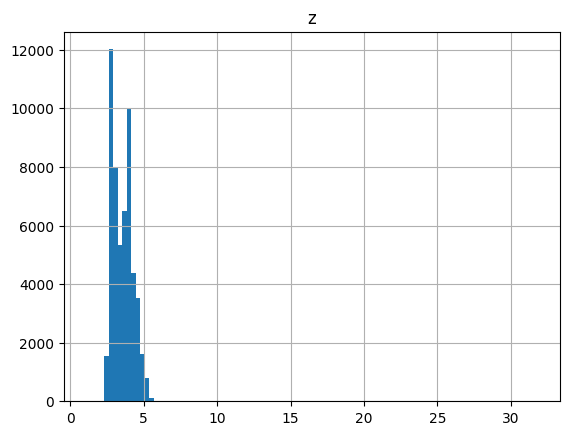

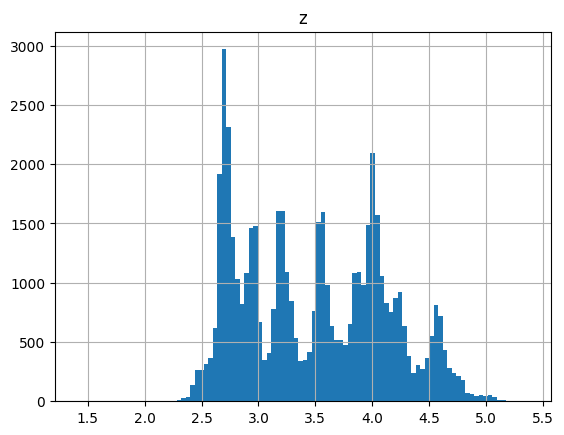

In [31]:
print (data.hist('x', bins=100))
print (data_filtered.hist('x', bins=100))
print (data.hist('y', bins=100))
print (data_filtered.hist('y', bins=100))
print (data.hist('z', bins=100))
print (data_filtered.hist('z', bins=100))

In [32]:
data_filtered.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume,density
count,51904.000000,51904.000000,51904.000000,51904.000000,51904.000000,51904.000000,51904.000000,51904.000000,51904.000000,51904.000000,51904.000000,51904.000000
mean,0.748796,3.911895,4.465032,4.102959,61.748008,57.418677,3534.578356,5.640388,5.643167,3.483335,121.917230,0.006125
std,0.401954,1.115147,1.679206,1.642497,1.415410,2.227468,3415.866962,1.026581,1.019801,0.634717,64.877828,0.000155
min,0.200000,1.000000,1.000000,1.000000,43.000000,43.000000,326.000000,3.730000,3.680000,1.410000,31.707984,0.002847
25%,0.390000,3.000000,3.000000,3.000000,61.100000,56.000000,928.000000,4.690000,4.700000,2.890000,64.144548,0.006047
50%,0.700000,4.000000,4.000000,4.000000,61.800000,57.000000,2290.000000,5.650000,5.660000,3.490000,113.076714,0.006115
75%,1.020000,5.000000,6.000000,5.000000,62.500000,59.000000,4959.000000,6.480000,6.470000,4.010000,166.461454,0.006188
max,2.000000,5.000000,7.000000,8.000000,79.000000,79.000000,18818.000000,8.420000,8.350000,5.370000,343.869300,0.018947


In [33]:
data.median()

carat         0.700000
cut           4.000000
color         4.000000
clarity       4.000000
depth        61.800000
table        57.000000
price      2401.000000
x             5.700000
y             5.710000
z             3.530000
volume      114.852720
density       0.006117
dtype: float64

Заключение
- Маскимальный объём уменьшен с 4000 до 350 мм^3. Гистограмма стала более простой для понимания. Среднее значение выше медианы, поэтому гистограмма имеет наклон вправо.
- На гистограмме без выбросов видно, что объём большей части алмазов находится в промежутке между 50 и 100. Максимальным объёмом является 343 мм^3, а минимальным - 31 мм^3. Средний объём - 121 мм^3.

Анализ данных

In [34]:
corelation = data_filtered.corr()
corelation['price']

carat      0.905261
cut       -0.047055
color     -0.097822
clarity   -0.080659
depth     -0.007157
table      0.108830
price      1.000000
x          0.870735
y          0.872671
z          0.865876
volume     0.907363
density    0.159802
Name: price, dtype: float64

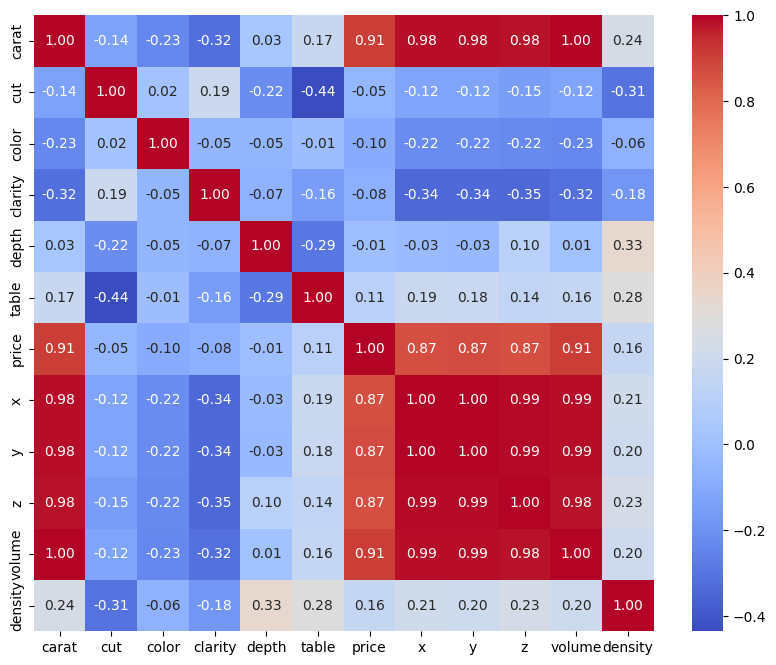

In [45]:
plt.figure(figsize=(10, 8))
sns.heatmap(corelation, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

Заключение
- Из тепловой карты видно, что масса в основном зависит от размеров алмаза, также чем выше цена алмаза тем он тяжелее, связь между плотностью и массой положительна, но слабая, вероятно это значит, что алмазы обладают схожей плотностью из-за чего влияние на массу ограничено (т.к. из физики мы знаем, что масса зависит от плотности).  Остальные взаимосвязи слабы и сложно сказать имеют ли эти значения какую-либо причинно-следственную связь.
- Из тепловой карты можно увидеть, что качество огранки имеет среднюю отрицательную корреляцию от характеристики ширины вершины алмаза относительно самой широкой точки, возможно это значит, что люди оценивающие огранку алмаза для вынесения оценки обращают внимание на ширину вершины алмаза относительно самой широкой точки. Остальные взаимосвязи слабы и сложно сказать имеют ли эти значения какую-либо причинно-следственную связь.
- Все взаимосвязи цвета слабы, без глубокого исследования нельзя сказать имеет ли цвет какую-либо зависимость от других параметров.
- Взаимосвязи чистоты с массой и объём средние, возможно  размер алмаза влияет на оценку внешнего вида алмаза, но без исследований нельзя узнать имеют ли эти значения какую-либо причинно-следственную связь. Остальные связи слабы.
- Из тепловой карты можно увидеть, что глубина имеет среднюю отрицательную корреляцию с объёмом и шириной вершины алмаза относительно самой широкой точки, возможно это происходит потому, что глубина вычисляется с использование величин x, y, z (при изучение информации в интернете обнаружена формула depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y). Остальные взаимосвязи слабы.
- Из тепловой карты можно увидеть, что корреляция цены сильно зависит от объёма и от массы, корреляция остальных характеристик слаба, это может значить, что при продаже алмаза люди не придают большого значения остальным характеристикам и их замечают только люди, разбирающиеся в обработке алмазов.

<Axes: xlabel='price', ylabel='volume'>

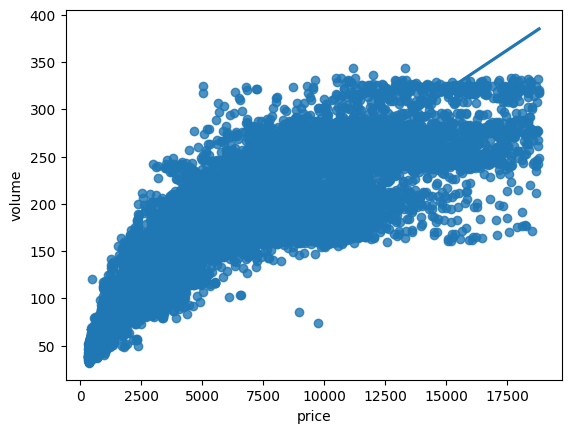

In [37]:
sns.regplot(x='price', y='volume', data=data_filtered)

<Axes: xlabel='depth', ylabel='density'>

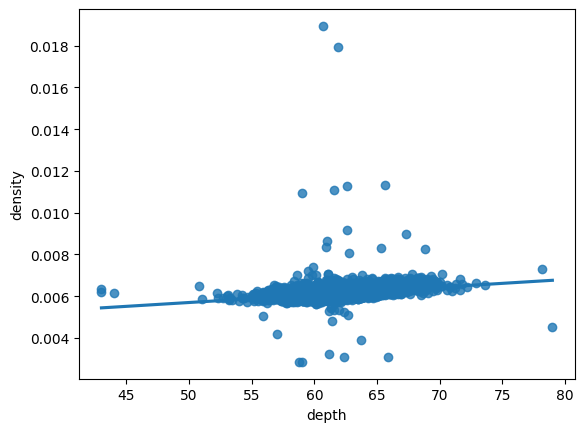

In [40]:
sns.regplot(x='depth', y='density', data=data_filtered)

# Общие выводы:

Изменение типа данных:

- Тип данных столбцов 'cut'	'color'	'clarity' изменен на int.

Редактирование данных:

- Добавили объём, который объёдиняет значения x, y, z
- Добавили плотность алмаза.
- Проверка дублированных данные и их удаление.

Проверка выбросов:

Выбросы параметров: масса, x, y, z

Удаление выбросов:

- Определили нижний и верхний пределы выбросов и сохранили их в отдельном DataFrame.
- Выполнили сравнение, используя гистограмму данных, которые содержат выбросы и не содержат выбросов. Сравнение показало, что гистограмма без выбросов позволяет легко исследовать среднее, медианное значение в данных столбцов.

Изучение ценового фактора:

*Объём алмаза*

Выяснилось, что цена алмаза сильно зависит от объёма алмаза, что делает этот параметр определяющим для стоимости алмаза.

*Масса алмаза*

Масса алмаза сильно влияет на цену алмаза, это значит, что при оценивании алмаза в первую очередь люди обращают внимание на массу.
Масса в основном зависит от размеров алмаза, также чем выше цена алмаза тем он тяжелее, связь между плотностью и массой положительна, но слабая, вероятно это значит, что алмазы обладают схожей плотностью из-за чего влияние на массу ограничено (т.к. из физики мы знаем, что масса зависит от плотности).

*Качество огранки алмаза*

Из тепловой карты можно увидеть, что качество огранки имеет среднюю отрицательную корреляцию от характеристики ширины вершины алмаза относительно самой широкой точки, возможно это значит, что люди оценивающие огранку алмаза для вынесения оценки обращают внимание на ширину вершины алмаза относительно самой широкой точки.

*Глубина алмаза*

глубина имеет среднюю отрицательную корреляцию с объёмом и шириной вершины алмаза относительно самой широкой точки, возможно это происходит потому, что глубина вычисляется с использование величин x, y, z (при изучение информации в интернете обнаружена формула depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y). Остальные взаимосвязи слабы.

*Свяизь с ценой*

Цвет, чистота, качество огранки алмаза слабо влияет на цену алмаза, это может говорить о том, что при продаже алмаза люди не придают большого значения этим характеристикам и их выделяют проффесианалы, разбирающиеся в обработке алмазов.


In [1]:
data_filtered.to_csv('data_regression.csv', index=False)

NameError: name 'data_filtered' is not defined